In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tabula as tb
plt.rcParams['figure.figsize']=(10,5)

In [3]:
first_df = tb.read_pdf("tasks/Практика 14 сентября 2021.pdf", pages="all")

Got stderr: Nov 04, 2021 1:37:01 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 04, 2021 1:37:01 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 04, 2021 1:37:02 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 04, 2021 1:37:02 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 04, 2021 1:37:03 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 04, 2021 1:37:03 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 04, 2021 1:37:04 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 04, 2021 1:37:04 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 04, 2021 1:37:04 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 04, 2021 1:37:04 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



In [4]:
stat_df_0 = first_df[0]
stat_df_1 = first_df[1]
stat_df_2 = first_df[2]
stat_df_3 = first_df[3]
stat_df_4 = first_df[4]
stat_df_5 = first_df[5]
stat_df_6 = first_df[6]
stat_df_7 = first_df[7]
stat_df_8 = first_df[8]

In [5]:
stat_df_8 = stat_df_8.drop([0,1], axis=0)

In [6]:
stat_df_8

,Вас устраивает расписание,Unnamed: 0,Unnamed: 1,Накопленный
2,Вполне устраивает,39,"1,6","1,6"
3,По большей части устраивает,132,"5,5","7,1"
4,"Отчасти устраивает, отчасти нет",624,"25,9","33,0"
5,По большей части не устраивает,749,"31,1","64,1"
6,Совершенно не устраивает,816,"33,9","98,0"
7,Затрудняюсь ответить,48,"2,0","100,0"
8,Всего,2409,"100,0",NaN


In [7]:
stat_df_8.rename(columns={"Вас устраивает расписание": "question", "Unnamed: 0":"votes", 
                          "Unnamed: 1": "percent", "Накопленный": "earned"}, inplace=True)

In [8]:
stat_df_8["votes"] = stat_df_8["votes"].apply(int)

In [9]:
stat_df_8["percent"] = stat_df_8["percent"].apply(lambda x: float(x.replace(",", ".")))

In [10]:
stat_df_8.fillna("100,0", inplace=True)

In [11]:
stat_df_8["earned"] = stat_df_8["earned"].apply(lambda x: float(x.replace(",", ".")))

In [12]:
stat_df_8.dtypes

question     object
votes         int64
percent     float64
earned      float64
dtype: object

In [13]:
vocab_count = pd.DataFrame({"words_known": ["1000","1001-1500", 
                            "1501-2000","2001-2500", 
                            "2501-3000", 
                            "3001-4000", 
                            "Более 4000"],
                        "number_of_students": [6,
                                                4,
                                                8,
                                                10,
                                                5,
                                                3,
                                                1]})

In [14]:
vocab_count

,words_known,number_of_students
0,1000,6
1,1001-1500,4
2,1501-2000,8
3,2001-2500,10
4,2501-3000,5
5,3001-4000,3
6,Более 4000,1


<AxesSubplot:xlabel='words_known', ylabel='number_of_students'>

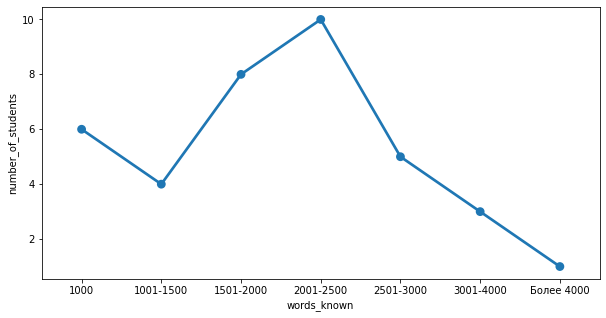

In [15]:

sns.pointplot(data=vocab_count, x="words_known", y='number_of_students')

In [16]:
vocab_count.sort_values(by="number_of_students", ascending=False)

,words_known,number_of_students
3,2001-2500,10
2,1501-2000,8
0,1000,6
4,2501-3000,5
1,1001-1500,4
5,3001-4000,3
6,Более 4000,1


In [17]:
vocab_count["percent_of_students"] = vocab_count["number_of_students"]/vocab_count["number_of_students"].sum() * 100

In [18]:
vocab_count["number_of_students"].median()

5.0

In [19]:
stat_df_0 = pd.DataFrame({"Exp": ["Менее года", "1","2","3","4","5","6","7","8","9+",],
                          "Teachers":[122, 214, 192, 136, 94, 73, 72, 53, 32, 22]})

In [20]:
stat_df_0

,Exp,Teachers
0,Менее года,122
1,1,214
2,2,192
3,3,136
4,4,94
5,5,73
6,6,72
7,7,53
8,8,32
9,9+,22


<AxesSubplot:xlabel='Exp', ylabel='Teachers'>

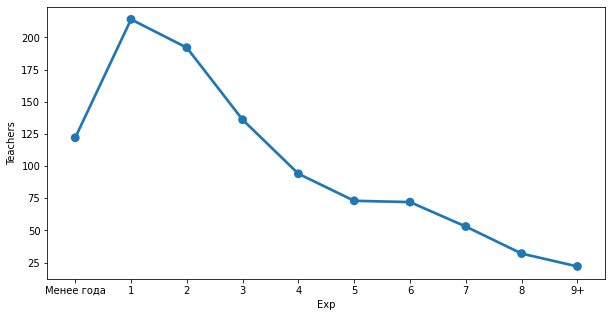

In [21]:

sns.pointplot(data=stat_df_0, x="Exp", y="Teachers")

In [22]:
stat_df_1 = stat_df_1.drop([0, 1], axis=0)

In [23]:
stat_df_1.columns = ["Поддержка", "Answer", "Percent"]

In [24]:
stat_df_1 = stat_df_1.reset_index().drop("index", axis=1)

In [25]:
stat_df_1[["Answer", "Percent"]] = stat_df_1[["Answer", "Percent"]].applymap(int)

<AxesSubplot:xlabel='Поддержка', ylabel='Percent'>

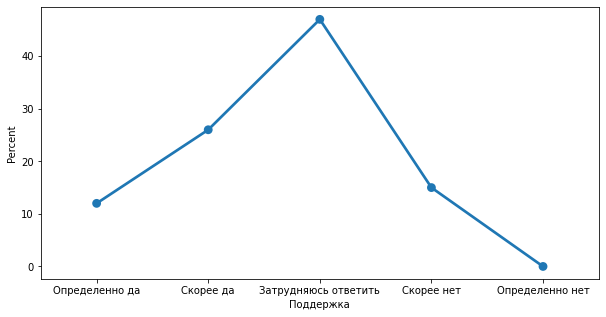

In [26]:

sns.pointplot(data=stat_df_1, x="Поддержка", y="Percent")

In [27]:
stat_df_2["Количество человек"] = stat_df_2["Количество человек"].apply(int)

<AxesSubplot:xlabel='Количество слов', ylabel='Количество человек'>

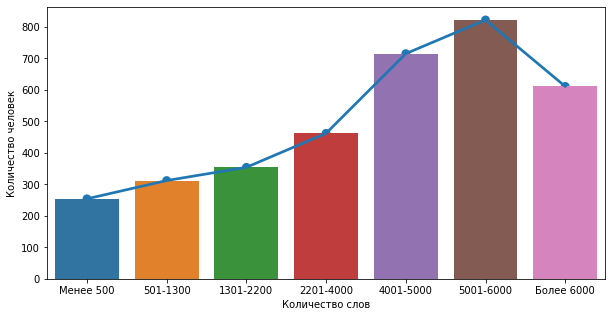

In [28]:
sns.barplot(data=stat_df_2, x="Количество слов", y="Количество человек")
sns.pointplot(data=stat_df_2, x="Количество слов", y="Количество человек")

In [29]:
stat_df_3 = stat_df_3.drop([0,2], axis=0)

In [30]:
stat_df_3 = pd.DataFrame({"Age": stat_df_3.columns, "Quant": stat_df_3.iloc[0]})

In [31]:
stat_df_3 = stat_df_3.reset_index().drop("index", axis=1).drop(0, axis=0)

In [32]:
stat_df_3 = stat_df_3.applymap(int)

<AxesSubplot:xlabel='Age', ylabel='Quant'>

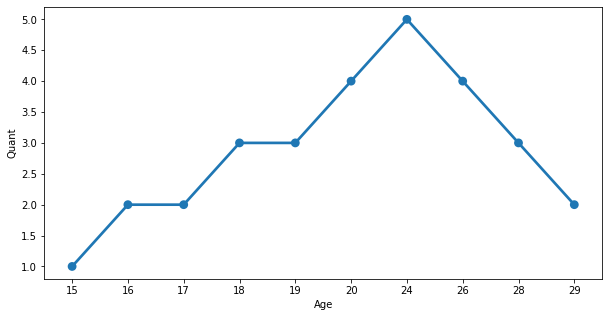

In [33]:
sns.pointplot(data=stat_df_3, x="Age", y="Quant")

<AxesSubplot:xlabel='Age', ylabel='Quant'>

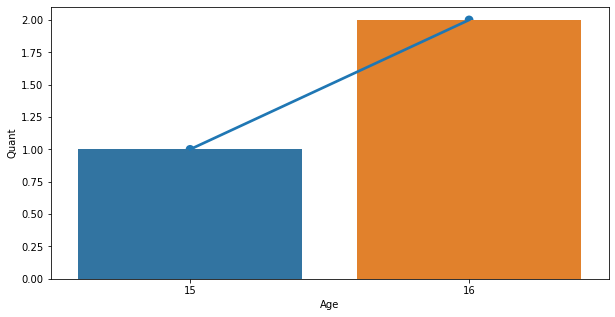

In [34]:
sns.barplot(data=stat_df_3.loc[stat_df_3["Age"] <= 16], x="Age", y="Quant")
sns.pointplot(data=stat_df_3.loc[stat_df_3["Age"] <= 16], x="Age", y="Quant")

<AxesSubplot:xlabel='Age', ylabel='Quant'>

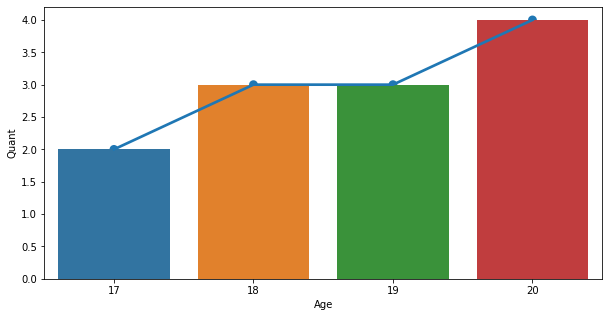

In [35]:
sns.barplot(data=stat_df_3.loc[(stat_df_3["Age"] >= 17) & (stat_df_3["Age"] <= 23)], x="Age", y="Quant")
sns.pointplot(data=stat_df_3.loc[(stat_df_3["Age"] >= 17) & (stat_df_3["Age"] <= 23)], x="Age", y="Quant")


<AxesSubplot:xlabel='Age', ylabel='Quant'>

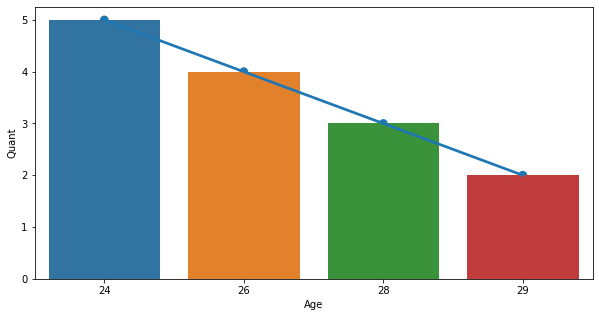

In [36]:
sns.barplot(data=stat_df_3.loc[(stat_df_3["Age"] >= 24) & (stat_df_3["Age"] <= 29)], x="Age", y="Quant")
sns.pointplot(data=stat_df_3.loc[(stat_df_3["Age"] >= 24) & (stat_df_3["Age"] <= 29)], x="Age", y="Quant")

In [37]:
stat_df_3_data = pd.DataFrame({"Interval":[], "Mode":[], "Median":[],"Mean":[], "Variance":[], "sd":[]})

In [38]:
filters = [(stat_df_3["Age"] >= 16),
           ((stat_df_3["Age"] >= 17) & (stat_df_3["Age"] <= 23)),
           ((stat_df_3["Age"] >= 24) & (stat_df_3["Age"] <= 29))
]


In [39]:
for filt, _index in zip(filters, range(4)):
    stat_df_3_data.loc[_index] = pd.Series({"Interval":_index, 
    "Mode":stat_df_3.loc[filt]["Quant"].mode(), 
    "Median":stat_df_3.loc[filt]["Quant"].median(),
    "Mean":stat_df_3.loc[filt]["Quant"].mean(), 
    "Variance":stat_df_3.loc[filt]["Quant"].var(), 
    "sd":stat_df_3.loc[filt]["Quant"].std()})

In [40]:
stat_df_3["Quant"].mode()

0    2
1    3
dtype: int64

In [41]:
stat_df_3_data

,Interval,Mode,Median,Mean,Variance,sd
0,0.0,0 2 1 3 dtype: int64,3.0,3.111111,1.111111,1.054093
1,1.0,0 3 dtype: int64,3.0,3.000000,0.666667,0.816497
2,2.0,0 2 1 3 2 4 3 5 dtype: int64,3.5,3.500000,1.666667,1.290994


<AxesSubplot:xlabel='Age', ylabel='Quant'>

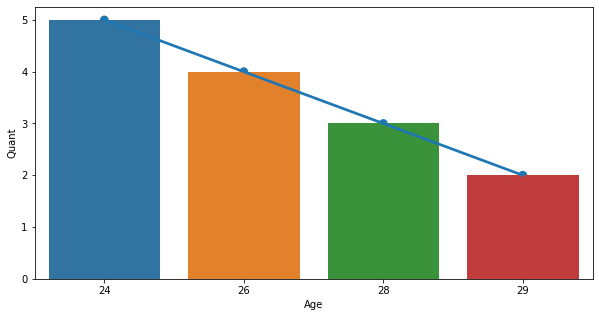

In [42]:
sns.barplot(data=stat_df_3.loc[(stat_df_3["Age"] > 21)], x="Age", y="Quant")
sns.pointplot(data=stat_df_3.loc[(stat_df_3["Age"] > 21)], x="Age", y="Quant")

<AxesSubplot:xlabel='Age', ylabel='Quant'>

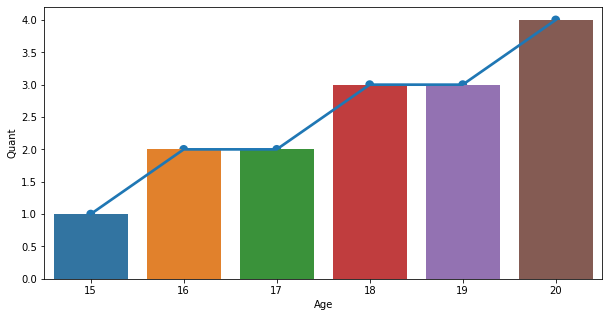

In [43]:
sns.barplot(data=stat_df_3.loc[(stat_df_3["Age"] < 21)], x="Age", y="Quant")
sns.pointplot(data=stat_df_3.loc[(stat_df_3["Age"] < 21)], x="Age", y="Quant")

In [44]:
stat_df_4.rename(columns={"Число кружков":"Clubs", "Количество выпускников":"Grads"}, inplace=True)
stat_df_4.dtypes

Clubs    int64
Grads    int64
dtype: object

In [45]:
filters_df_4 = [(stat_df_4["Clubs"]<3), 
                (stat_df_4["Clubs"]>=3) & (stat_df_4["Clubs"]<=4),
                (stat_df_4["Clubs"]>=5) & (stat_df_4["Clubs"]<=6),
                (stat_df_4["Clubs"]>6),
                (stat_df_4["Clubs"]==4),
                (stat_df_4["Clubs"]==5),
                (stat_df_4["Clubs"]<=6)]

In [46]:
stat_df_4.dtypes

Clubs    int64
Grads    int64
dtype: object

In [47]:
max_interval = stat_df_4.loc[filters_df_4[0]]["Grads"].sum()
for _filter in filters_df_4:
    if stat_df_4.loc[_filter]["Grads"].sum() > max_interval:
        max_interval = stat_df_4.loc[_filter]["Grads"].sum()



In [48]:
max_interval

3343

In [49]:
stat_df_5 = stat_df_5.drop(0, axis=0)

In [50]:
stat_df_5 = stat_df_5.drop("Значение", axis=1)

In [51]:
stat_df_5 = pd.DataFrame({"Hours":[1,2,3,4,5,6,7,8,9,10,11,12,17,18,24,25, 30, 36, 42],
                          "Teachers": [2, 10,9,3,4,5,3,1,1,1,2,6,1, 8, 16, 2, 6, 3, 1]})

In [52]:
stat_df_5

,Hours,Teachers
0,1,2
1,2,10
2,3,9
3,4,3
4,5,4
5,6,5
6,7,3
7,8,1
8,9,1
9,10,1
